In [77]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Carl-Éric\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Carl-Éric\.julia\environments\v1.10\Manifest.toml`


In [78]:
using CSV, DataFrames, Statistics, Dates, Gadfly, LinearAlgebra, Plots

In [79]:
data_2 = CSV.read("./benchmark_1.csv", DataFrame)
data_1 = CSV.read("./soumissions_officielles/soumission_18/benchmark18_equipe_T.csv", DataFrame)
# data_3 = CSV.read("./soumissions_officielles/benchmark_2024-12-01_15-26-35.csv", DataFrame) =#


difference = data_1.consommation - data_2.consommation
diff_df = DataFrame(id=data_1.id, diff=difference)

total_diff = sum(abs.(diff_df.diff).^2)/150

println(total_diff)


6.38366508330032e-5


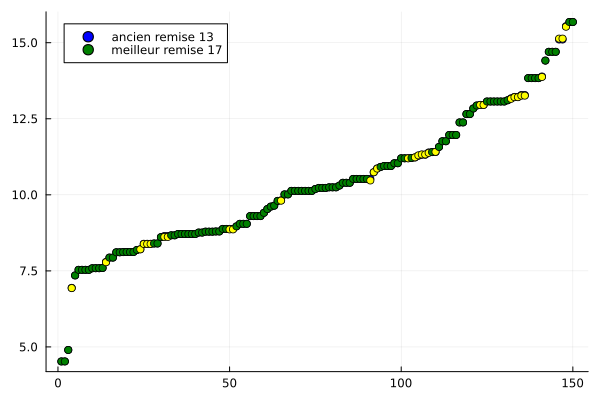

In [80]:
common_ids = intersect(data_1.id, data_2.id)
diff_ids = filter(id -> data_1[data_1.id .== id, :consommation] != data_2[data_2.id .== id, :consommation], common_ids)
data_1_common = filter(row -> row.id in common_ids, data_1)
data_2_common = filter(row -> row.id in common_ids, data_2)


data_1_sorted = sort(data_1, :consommation)
data_2_sorted = [data_2.consommation[i] for i in data_1_sorted.id]
#= data_3_sorted = [data_3.consommation[i] for i in data_1_sorted.id]
 =#
colors1 = [(i in common_ids ? :blue : :blue) for i in data_1_sorted.id]
colors2 = [(i in diff_ids ? :yellow : :green) for i in data_1_sorted.id]
#= colors3 = [(i in common_ids ? :black : :white) for i in data_1_sorted.id]
 =#

scatter(1:150, data_1_sorted.consommation, c=colors1, label="ancien remise 13")
scatter!(1:150, data_2_sorted, c=colors2, label= "meilleur remise 17")
#= scatter!(1:150, data_3_sorted, c=colors3, label= "new one only lin (?)")
 =#

# scatter(data_1.id, data_1.consommation)
# scatter!(data_2.id, data_2.consommation)
# scatter!(data_3.id, data_3.consommation)

# bleu c<est le meilleur

# orange le dernier



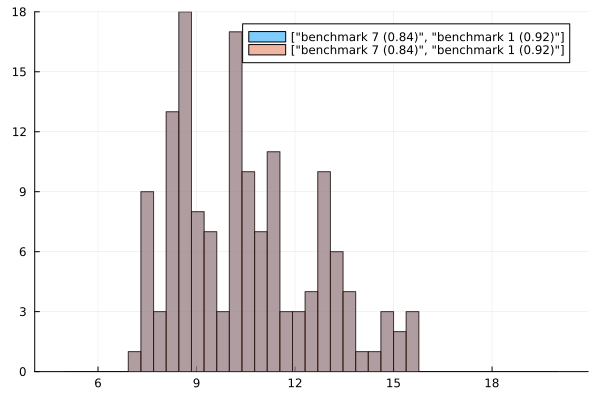

In [81]:
histogram([data_1.consommation,data_2.consommation], bins=LinRange(5,20,40), alpha=0.5, labels=["benchmark 7 (0.84)", "benchmark 1 (0.92)"])


In [82]:
data_2_common

Row,id,consommation
,Int64,Float64
1,1,8.11069
2,2,7.59532
3,3,8.66848
4,4,8.71148
5,5,13.8739
6,6,13.8359
7,7,13.8359
8,8,10.2265
9,9,10.9459
